📂 Loading graph_state.pkl...
✅ Graph Loaded: 20 Nodes, 51 Edges

--- 🏆 TOP NODES (By Popularity/Hits) ---
   🔹 Laphing              Hits: 7
   🔹 Veg Burger           Hits: 6
   🔹 Chicken Burger       Hits: 2
   🔹 Momo                 Hits: 0
   🔹 Chicken Salad        Hits: 0
   🔹 Veg Salad            Hits: 0
   🔹 Pasta Arrabiata      Hits: 0
   🔹 Margherita Pizza     Hits: 0
   🔹 Pasta Alfredo        Hits: 0
   🔹 Pepperoni Pizza      Hits: 0
   🔹 Chocolate Cake       Hits: 0
   🔹 Chatamari            Hits: 0
   🔹 Vanilla Ice Cream    Hits: 0
   🔹 Bara                 Hits: 0
   🔹 Aloo Tama            Hits: 0
   🔹 Pani Puri            Hits: 0
   🔹 Yomari               Hits: 0
   🔹 Sekuwa               Hits: 0
   🔹 Yak Cheese Sandwich  Hits: 0
   🔹 Jeri Swari           Hits: 0

--- 🔗 STRONGEST CONNECTIONS (Top 5) ---
   🔸 Veg Salad <--> Laphing : 2.58
   🔸 Veg Burger <--> Veg Salad : 2.30
   🔸 Veg Burger <--> Chicken Burger : 1.36
   🔸 Veg Burger <--> Chicken Salad : 0.77
   🔸 Margherita

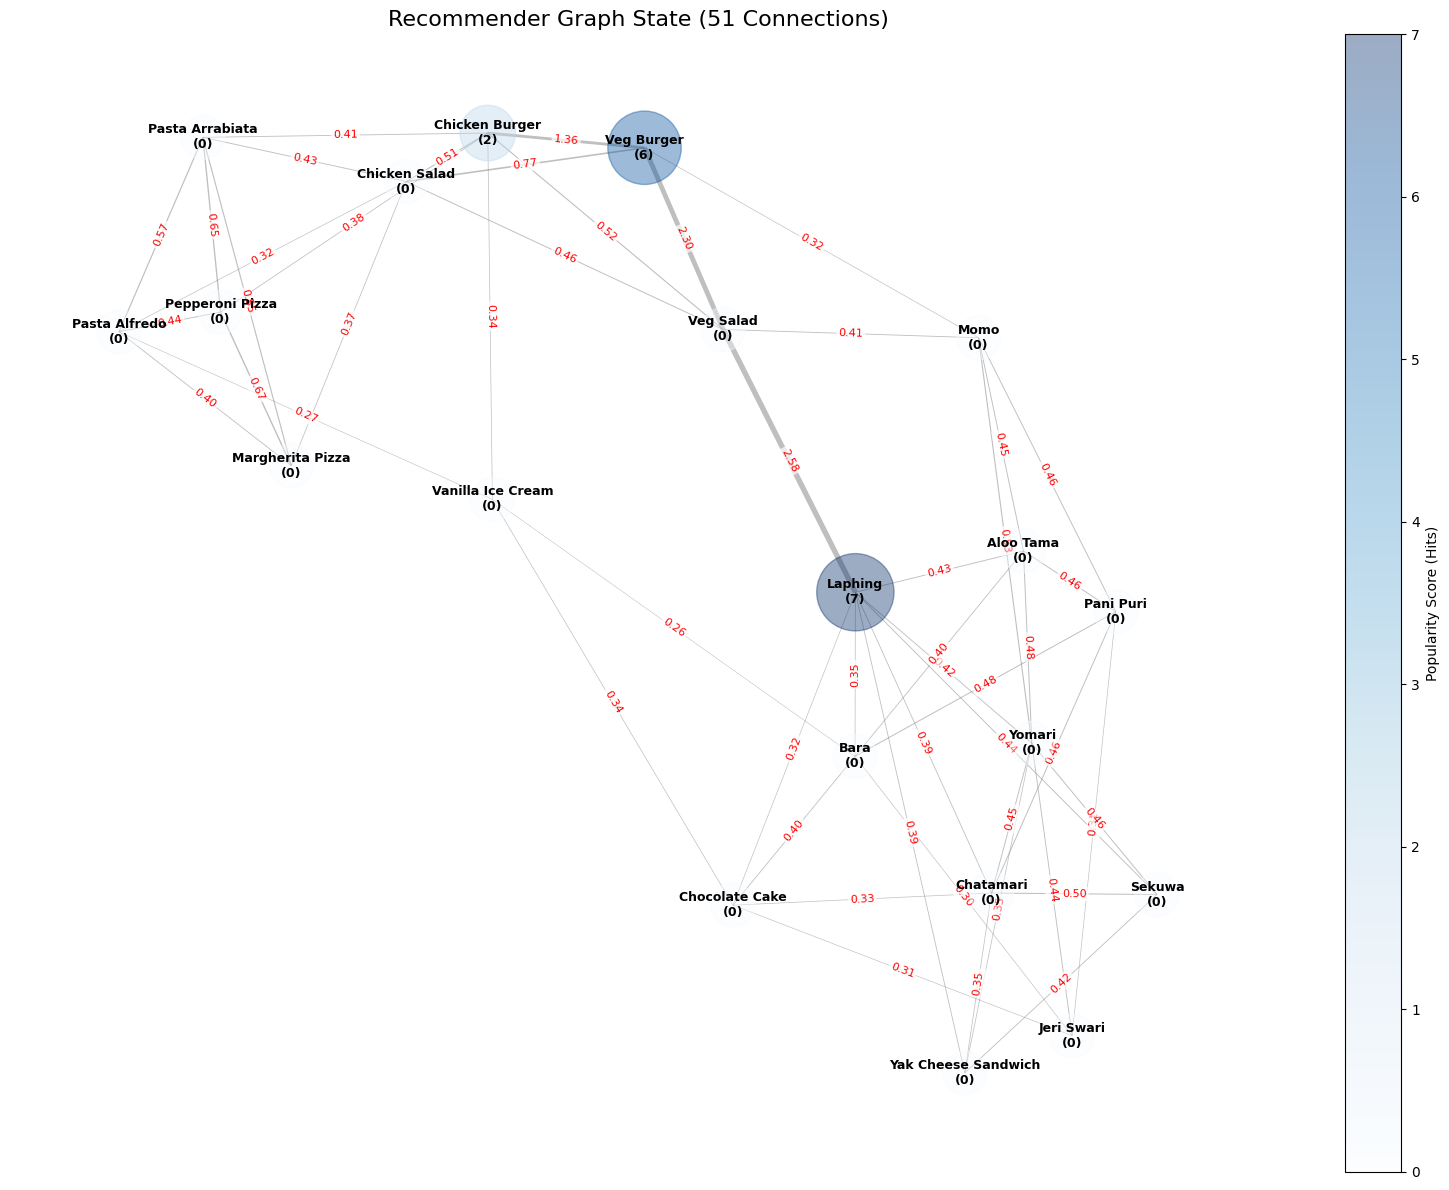

In [11]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import os


FILENAME = "graph_state.pkl"

def visualize_pkl():
    # 1. Check if file exists
    if not os.path.exists(FILENAME):
        print(f"❌ Error: '{FILENAME}' not found. Please run the FastAPI app and generate some data first.")
        return

    # 2. Load the Graph
    print(f"📂 Loading {FILENAME}...")
    with open(FILENAME, 'rb') as f:
        G = pickle.load(f)

    print(f"✅ Graph Loaded: {len(G.nodes)} Nodes, {len(G.edges)} Edges")

    # ---------------------------------------------------------
    # 📊 TEXT ANALYSIS
    # ---------------------------------------------------------
    print("\n--- 🏆 TOP NODES (By Popularity/Hits) ---")
    # Sort nodes by 'hits'
    sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get('hits', 0), reverse=True)
    for node, data in sorted_nodes:
        print(f"   🔹 {node:<20} Hits: {data.get('hits', 0)}")

    print("\n--- 🔗 STRONGEST CONNECTIONS (Top 5) ---")
    # Sort edges by 'weight'
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    for u, v, data in sorted_edges[:5]:
        print(f"   🔸 {u} <--> {v} : {data['weight']:.2f}")

    # ---------------------------------------------------------
    # 🎨 VISUALIZATION
    # ---------------------------------------------------------
    plt.figure(figsize=(16, 12))
    
    # Layout: Spring layout usually reveals clusters best
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    # 1. NODE SIZING (Based on Hits)
    # Base size 1000, adds 300 per hit.
    node_sizes = [1000 + (G.nodes[n].get('hits', 0) * 300) for n in G.nodes()]
    
    # 2. NODE COLORING (Darker blue = More Popular)
    node_colors = [G.nodes[n].get('hits', 0) for n in G.nodes()]

    # 3. EDGE WIDTH (Based on Weight)
    # Weight * 1.5 to make them visible
    edge_widths = [G[u][v]['weight'] * 1.5 for u, v in G.edges()]
    
    # 4. EDGE LABELS (Show weights)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

    # Draw Nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, alpha=0.4)
    
    # Draw Edges
    edges = nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.5)
    
    # Draw Edge Labels
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red',
        font_size=8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2')
    )
    
    # Draw Node Labels (Name + Hits)
    labels = {n: f"{n}\n({G.nodes[n].get('hits', 0)})" for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight="bold")

    # Add Colorbar for popularity
    plt.colorbar(nodes, label="Popularity Score (Hits)")
    
    plt.title(f"Recommender Graph State ({len(G.edges)} Connections)", fontsize=16)
    plt.axis('off') # Hide axis ticks
    plt.tight_layout()
    
    print("\n🖼️  Opening Plot Window...")
    plt.show()


if __name__ == "__main__":
    visualize_pkl()